In [ ]:
#The dataset to be predicted (1 minute recording from muse-lsl)

dataset = "EEG_recording_2021-09-25-13.53.16.csv"

In [1]:
from joblib import dump, load

In [2]:
#The trained model 

model = load('model.joblib') 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [36]:
import shutil
import os
try: 
    shutil.rmtree("testing_data/")
    print("deleted testing_data/")
except FileNotFoundError:
    print("folder testing_data/ does not exist")
    
print("creating testing_data/")
os.mkdir("testing_data/")

deleted testing_data/
creating testing_data/


In [23]:
#Since the data is recorded using muse-lsl, rescaling is not required

import pandas as pd
import numpy as np



df = pd.read_csv(dataset)
df.to_csv("testing_data/muse_data_subset-lostinmigration-546728863431538125.csv", index=False) #giving random name, doesn't matter

In [37]:
#This is an example of how to predict using MuseMonitor data

import pandas as pd
import numpy as np

dataset = "dataset/original_data_main/muse_data_subset-relaxedeyesopen-2464149665160780886.csv"
df = pd.read_csv(dataset)
for electrode in ["TP9", "TP10", "AF7", "AF8", "Right AUX"]:    
    data = df[electrode]
    data = 0.48828125 * (np.array(data))
    data = 1680 * ((data) - data.min()) / (data.max() - data.min())
    df[electrode] = data
df.to_csv("testing_data/muse_data_subset-lostinmigration-546728863431538125.csv", index=False)

In [38]:
from EEG_generate_training_matrix import gen_training_matrix

data_directory_path = "testing_data/"
preprocessed_data_file_name = "out_main.csv"

print("generating training matrix...")
gen_training_matrix(data_directory_path, preprocessed_data_file_name, cols_to_ignore = -1)

generating training matrix...
Using file muse_data_subset-lostinmigration-546728863431538125.csv
resulting vector shape for the file (146, 989)
FINAL_MATRIX (146, 989)


In [39]:
nRowsRead = None # specify 'None' if want to read whole file
# mental-state.csv has 2360 rows in reality, but we are only loading/previewing the first 1000 rows
preprocessed_data_file_name = "out_main.csv"
df = pd.read_csv(preprocessed_data_file_name, delimiter=',', nrows = nRowsRead)
df.dataframeName = preprocessed_data_file_name
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 146 rows and 989 columns


,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,1071.276676,768.685500,639.900975,706.125851,-273.358776,-219.830064,276.227510,-77.546966,1132.736649,1116.948067,...,0.009865,0.010657,0.007769,0.005392,0.012197,0.003966,0.010831,0.005418,0.016520,1.0
1,824.594149,746.314058,727.074124,682.815377,0.659019,-64.251183,-6.585980,14.764608,814.841329,807.022532,...,0.002894,0.002416,0.006410,0.005211,0.003362,0.005110,0.004896,0.001800,0.002019,1.0
2,834.154571,723.524125,740.559974,678.908204,67.471484,37.631685,20.862080,13.573647,865.315132,767.115154,...,0.019297,0.010011,0.004567,0.003769,0.018248,0.013859,0.015017,0.008345,0.004218,1.0
3,908.394257,724.008118,707.581870,717.578149,36.576455,-24.799550,-49.660360,-27.242018,891.297809,865.919700,...,0.008484,0.004658,0.004525,0.009194,0.010469,0.011944,0.017437,0.012290,0.012450,1.0
4,918.667891,752.642088,739.315912,762.554967,-71.623762,-45.449728,-25.367163,-151.866942,873.226697,797.440491,...,0.009302,0.016732,0.005760,0.014159,0.008047,0.008954,0.012452,0.007484,0.013083,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,821.205670,764.067106,713.750654,650.491813,-31.021203,19.351349,-32.211119,-33.239980,854.945973,750.014567,...,0.000982,0.008634,0.014337,0.013163,0.012307,0.009119,0.012468,0.008713,0.006256,1.0
142,921.924188,765.963582,701.191688,695.097082,-167.520629,16.869355,-73.814497,-90.947075,1053.961317,757.652916,...,0.021883,0.002777,0.013716,0.014357,0.003832,0.007958,0.007444,0.010327,0.009880,1.0
143,868.445813,744.901951,715.278939,665.350015,24.125499,7.557156,11.231799,22.578263,892.654408,743.075175,...,0.009255,0.009964,0.007988,0.007224,0.004053,0.010103,0.010650,0.001304,0.005426,1.0
144,895.824674,742.371370,708.275421,651.429232,-49.374474,-4.774009,-3.016374,-3.268922,938.223460,750.798331,...,0.020784,0.001182,0.016847,0.005429,0.009055,0.004468,0.014556,0.000700,0.005580,1.0


In [40]:
X_muse_test = df.drop("Label", axis=1)

In [41]:
y_muse_pred = model.predict(X_muse_test)

In [43]:
y_muse_pred_proba = model.predict_proba(X_muse_test)

In [55]:
relaxed_percentage = y_muse_pred_proba[:,0].mean()

In [56]:
active_percentage = y_muse_pred_proba[:,1].mean()

In [57]:
print("relaxed percentage:",relaxed_percentage)
print("active percentage:", active_percentage)

relaxed percentage: 0.9369634703196348
active percentage: 0.0630365296803653


In [66]:
active_values = y_muse_pred_proba[:,1]
relaxed_values = y_muse_pred_proba[:,0]

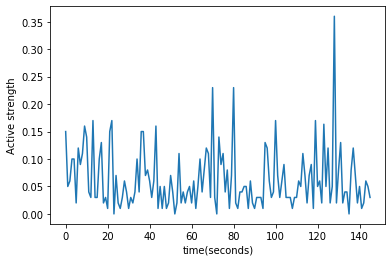

In [67]:
import matplotlib.pyplot as plt
plt.plot(active_values, label="active chart")
plt.ylabel('Active strength')
plt.xlabel('time(seconds)')
plt.show()


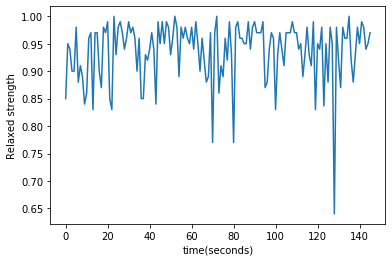

In [68]:
import matplotlib.pyplot as plt
plt.plot(relaxed_values, label="relaxed chart")
plt.ylabel('Relaxed strength')
plt.xlabel('time(seconds)')
plt.show()
